In [178]:
import pandas as pd
import seaborn as sns 
sns.set_palette('pastel')
from datetime import datetime

In [179]:
bh = pd.read_csv('datasets/barts_hotspots.csv') # bart stations to hotspot and vice versa
ba = pd.read_csv('datasets/barts_to_all.csv') # bart stations to all TAZs
ha = pd.read_csv('datasets/hotspots_to_all.csv')# hotspots to all TAZs
h1 = pd.read_csv('datasets/hours_q1.csv') # ride times for Quarter 1
h2 = pd.read_csv('datasets/hours_q2.csv') # ride times for Quarter 2
# bh.head(10)

In [180]:
# ba.head(10)

In [181]:
# ha.head(10)

In [182]:
h1.head(10)

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,3768,3700,3,161.58,87.83,147.02,1.49
1,3772,3660,3,373.98,217.24,328.16,1.65
2,3751,3708,6,1197.27,259.18,1171.36,1.23
3,3761,3608,6,588.32,223.30,557.92,1.36
4,3767,3724,17,438.98,235.70,395.22,1.55
5,3778,3614,17,1771.23,439.96,1717.16,1.28
6,3769,3704,17,511.86,270.83,460.53,1.55
7,3775,3644,17,544.15,228.36,513.53,1.37
8,3772,3674,17,963.83,504.70,858.42,1.61
9,3779,3604,17,501.38,176.70,478.24,1.35


In [183]:
# h2.head(10)

In [184]:
#TAZ traffic analysis zone
#For every Hotspot, recommend the appropriate BART station to get off of in order to **minimize travel time**.

In [185]:
# ha.head(10)

In [186]:
# Add the travel time information in minutes
bh['Daily Mean Travel Time (Minutes)'] = bh['Daily Mean Travel Time (Seconds)']/60
bh['AM Mean Travel Time (Minutes)'] = bh['AM Mean Travel Time (Seconds)']/60
bh['PM Mean Travel Time (Minutes)'] = bh['PM Mean Travel Time (Seconds)']/60
bh['Midday Mean Travel Time (Minutes)'] = bh['Midday Mean Travel Time (Seconds)']/60
bh['Evening Mean Travel Time (Minutes)'] = bh['Evening Mean Travel Time (Seconds)']/60
bh['Early Morning Mean Travel Time (Minutes)'] = bh['Early Morning Mean Travel Time (Seconds)']/60

In [187]:
#Step1:ha
# We note that there are three hotspot locations
print(ha['Origin Movement ID'].unique())

[3394 3792 3396]


In [188]:
# There are also three train stations in barts_to_all
print(ba['Origin Movement ID'].unique())

[3603 3692 3760]


In [189]:
# These train stations are as follows:
ba['Origin Display Name'].unique()

array(['Embarcadero, San Francisco, CA',
       '2nd Street and Stevenson Street (Montgomery BART, San Francisco, CA',
       'Powell BART Station, Market St and Powell St, San Francisco, CA'],
      dtype=object)

In [190]:
# We also see all of the three hotspots and train stations in both barts to hotspot's origins and its destinations
print(bh['Origin Movement ID'].unique())

[3396 3603 3792 3394 3692 3760]


In [191]:
print(bh['Destination Movement ID'].unique())

[3603 3394 3396 3792 3692 3760]


In [192]:
# We start by getting row entries for specific hotspots
bh_hotspots_3394 = bh[(bh['Origin Movement ID'] == 3394)|(bh['Destination Movement ID'] == 3394)]
# bh_hotspots_3394 # display data for hotspot 3394 (fisherman's wharf)

In [193]:
bh_hotspots_3792 = bh[(bh['Origin Movement ID'] == 3792)|(bh['Destination Movement ID'] == 3792)]
# bh_hotspots_3792 # display data for hotspot 3792 (oracle park)

In [194]:
bh_hotspots_3396 = bh[(bh['Origin Movement ID'] == 3396)|(bh['Destination Movement ID'] == 3396)]
# bh_hotspots_3396 # display data for hotspot 3396 (palace of fine arts)

In [195]:
def traveltimesperhotspot(df):
    dfboxplot = df.boxplot(column=['Daily Mean Travel Time (Minutes)',
       'AM Mean Travel Time (Minutes)',
       'PM Mean Travel Time (Minutes)',
       'Midday Mean Travel Time (Minutes)',
       'Evening Mean Travel Time (Minutes)',
       'Early Morning Mean Travel Time (Minutes)',
                                    ],figsize = (8,6),rot=50)
    return dfboxplot
# exploring travel times for different hotspots
# we looked at data for each timeframe

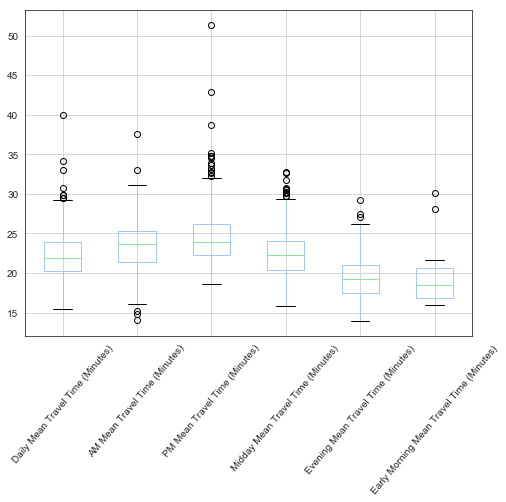

In [196]:
traveltimesperhotspot(bh_hotspots_3396)
# Observation:  midday has the longest travel time, while the early morning has the shortest by 10 minutes

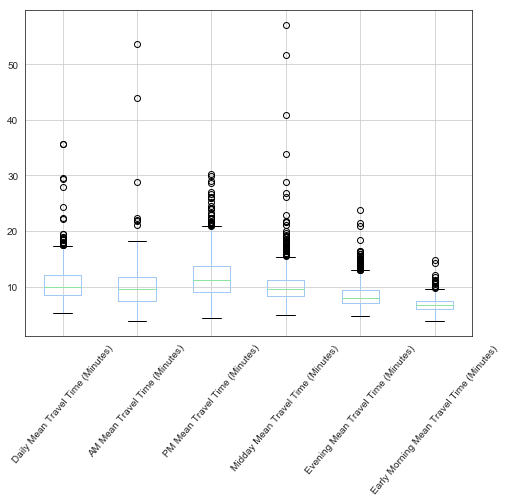

In [197]:
traveltimesperhotspot(bh_hotspots_3792)

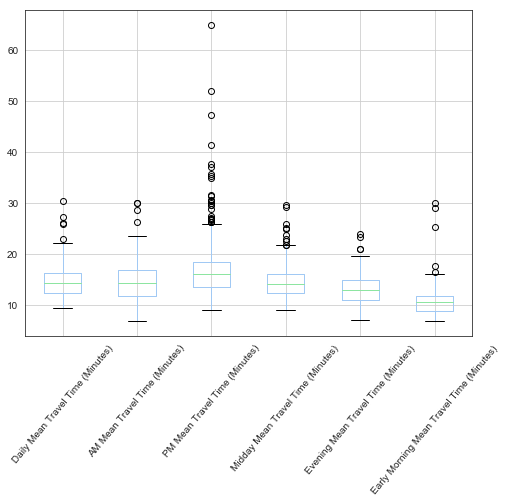

In [198]:
traveltimesperhotspot(bh_hotspots_3394)

In [199]:
"""
This function swaps the origin and destination data if the origin is not a hotspot.
We do this because the time from A to B is the same as the time from B to A,
and we apply this function to isolated datasets that are hotspot-specific.
"""
def barts_hopspot_time_match(h1_TAZ, TAZ):
    b =h1_TAZ[h1_TAZ['Destination Movement ID'] == TAZ]
    a = h1_TAZ[h1_TAZ['Destination Movement ID'] != TAZ]
    display(a)
    display(b)
    b['Destination Movement ID'] = b['Origin Movement ID']
    b['Origin Movement ID'] = [TAZ]*len(b)
    c = pd.concat([a,b],join = 'outer',axis = 0)
    return c

In [200]:
bh_hotspots_3396 = barts_hopspot_time_match(bh_hotspots_3396, 3396)
bh_hotspots_3396.head(10)

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
0,06/09/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0,NaN,NaN,...,NaN,NaN,NaN,NaN,26.466667,NaN,NaN,NaN,NaN,NaN
15,06/06/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1363.0,1166.0,1595.0,1327.0,1164.0,...,NaN,NaN,NaN,NaN,22.716667,22.116667,25.450000,22.833333,NaN,NaN
16,04/18/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1313.0,964.0,1789.0,1489.0,1051.0,...,NaN,NaN,NaN,NaN,21.883333,24.816667,NaN,23.216667,NaN,NaN
18,06/11/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1438.0,1060.0,1951.0,1259.0,1102.0,...,NaN,NaN,NaN,NaN,23.966667,20.983333,30.616667,NaN,NaN,NaN
30,05/03/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1214.0,990.0,1488.0,1152.0,962.0,...,NaN,NaN,NaN,NaN,20.233333,19.200000,22.733333,19.783333,NaN,NaN
42,04/12/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1216.0,997.0,1483.0,1220.0,939.0,...,NaN,NaN,NaN,NaN,20.266667,20.333333,NaN,NaN,NaN,NaN
51,04/01/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1391.0,1097.0,1763.0,1483.0,1344.0,...,NaN,NaN,NaN,NaN,23.183333,24.716667,NaN,NaN,NaN,NaN
53,06/07/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1210.0,980.0,1493.0,1182.0,931.0,...,NaN,NaN,NaN,NaN,20.166667,19.700000,NaN,19.383333,NaN,NaN
58,05/13/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1662.0,1032.0,2677.0,1444.0,1090.0,...,NaN,NaN,NaN,NaN,27.700000,24.066667,NaN,NaN,NaN,NaN
63,05/26/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
9,04/14/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",996.0,853.0,1164.0,NaN,NaN,...,NaN,NaN,NaN,NaN,16.600000,NaN,NaN,17.716667,NaN,NaN
29,05/30/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1112.0,768.0,1608.0,845.0,474.0,...,1188.0,NaN,NaN,NaN,18.533333,14.083333,23.116667,19.850000,16.166667,NaN
32,06/03/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1220.0,1011.0,1473.0,NaN,NaN,...,NaN,NaN,NaN,NaN,20.333333,NaN,20.766667,19.916667,NaN,NaN
35,05/27/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1066.0,901.0,1262.0,NaN,NaN,...,NaN,NaN,NaN,NaN,17.766667,NaN,NaN,18.583333,NaN,NaN
39,04/21/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1331.0,1094.0,1619.0,NaN,NaN,...,NaN,NaN,NaN,NaN,22.183333,NaN,NaN,22.216667,NaN,NaN
41,04/13/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1143.0,954.0,1370.0,NaN,NaN,...,NaN,NaN,NaN,NaN,19.050000,NaN,NaN,20.216667,NaN,NaN
47,05/02/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1144.0,894.0,1465.0,NaN,NaN,...,945.0,NaN,NaN,NaN,19.066667,NaN,22.616667,NaN,15.033333,NaN
48,06/10/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1155.0,940.0,1420.0,NaN,NaN,...,1237.0,NaN,NaN,NaN,19.250000,NaN,21.716667,20.066667,17.150000,NaN
50,06/17/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1106.0,867.0,1411.0,NaN,NaN,...,1058.0,NaN,NaN,NaN,18.433333,NaN,21.150000,20.083333,14.550000,NaN
61,05/03/2019,3603,"Embarcadero, San Francisco, CA",3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",1209.0,966.0,1513.0,NaN,NaN,...,NaN,NaN,NaN,NaN,20.150000,NaN,22.550000,19.933333,NaN,NaN


C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
0,06/09/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1588.0,1054.0,2392.0,NaN,NaN,...,NaN,NaN,NaN,NaN,26.466667,NaN,NaN,NaN,NaN,NaN
15,06/06/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1363.0,1166.0,1595.0,1327.0,1164.0,...,NaN,NaN,NaN,NaN,22.716667,22.116667,25.450000,22.833333,NaN,NaN
16,04/18/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1313.0,964.0,1789.0,1489.0,1051.0,...,NaN,NaN,NaN,NaN,21.883333,24.816667,NaN,23.216667,NaN,NaN
18,06/11/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1438.0,1060.0,1951.0,1259.0,1102.0,...,NaN,NaN,NaN,NaN,23.966667,20.983333,30.616667,NaN,NaN,NaN
30,05/03/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1214.0,990.0,1488.0,1152.0,962.0,...,NaN,NaN,NaN,NaN,20.233333,19.200000,22.733333,19.783333,NaN,NaN
42,04/12/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1216.0,997.0,1483.0,1220.0,939.0,...,NaN,NaN,NaN,NaN,20.266667,20.333333,NaN,NaN,NaN,NaN
51,04/01/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1391.0,1097.0,1763.0,1483.0,1344.0,...,NaN,NaN,NaN,NaN,23.183333,24.716667,NaN,NaN,NaN,NaN
53,06/07/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1210.0,980.0,1493.0,1182.0,931.0,...,NaN,NaN,NaN,NaN,20.166667,19.700000,NaN,19.383333,NaN,NaN
58,05/13/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",1662.0,1032.0,2677.0,1444.0,1090.0,...,NaN,NaN,NaN,NaN,27.700000,24.066667,NaN,NaN,NaN,NaN
63,05/26/2019,3396,"The Palace Of Fine Arts, 3601 Lyon St, San Fra...",3603,"Embarcadero, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
bh_hotspots_3792 = barts_hopspot_time_match(bh_hotspots_3792, 3792)
bh_hotspots_3792.head(10)

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
3,04/18/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0,648.0,461.0,...,608.0,363.0,297.0,443.0,8.533333,10.800000,8.816667,8.800000,7.366667,6.050000
4,04/08/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.0,364.0,701.0,621.0,489.0,...,711.0,NaN,NaN,NaN,8.416667,10.350000,11.516667,7.150000,8.366667,NaN
5,06/30/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",616.0,385.0,987.0,NaN,NaN,...,541.0,NaN,NaN,NaN,10.266667,NaN,10.816667,NaN,6.433333,NaN
12,06/11/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",643.0,451.0,916.0,814.0,646.0,...,585.0,449.0,371.0,542.0,10.716667,13.566667,13.616667,9.916667,7.716667,7.483333
20,05/01/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",527.0,394.0,704.0,639.0,472.0,...,583.0,NaN,NaN,NaN,8.783333,10.650000,10.600000,8.333333,7.883333,NaN
24,05/26/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",449.0,325.0,621.0,NaN,NaN,...,602.0,NaN,NaN,NaN,7.483333,NaN,5.966667,8.100000,7.400000,NaN
33,06/26/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",585.0,396.0,865.0,703.0,460.0,...,466.0,NaN,NaN,NaN,9.750000,11.716667,9.850000,10.383333,6.483333,NaN
34,06/28/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",597.0,433.0,822.0,598.0,465.0,...,741.0,362.0,320.0,408.0,9.950000,9.966667,11.083333,10.366667,8.833333,6.033333
38,05/28/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",547.0,391.0,764.0,708.0,522.0,...,721.0,NaN,NaN,NaN,9.116667,11.800000,11.266667,7.683333,8.500000,NaN
57,06/15/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",463.0,337.0,637.0,340.0,287.0,...,478.0,NaN,NaN,NaN,7.716667,5.666667,9.083333,7.333333,6.150000,NaN


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
11,04/18/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",591.0,417.0,837.0,650.0,462.0,...,688.0,417.0,331.0,525.0,9.850000,10.833333,12.550000,10.233333,8.266667,6.950000
14,04/21/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",469.0,332.0,664.0,480.0,380.0,...,611.0,410.0,301.0,558.0,7.816667,8.000000,7.983333,8.350000,7.583333,6.833333
17,05/16/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",605.0,434.0,842.0,609.0,469.0,...,669.0,408.0,312.0,533.0,10.083333,10.150000,13.416667,10.950000,8.266667,6.800000
21,04/27/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",510.0,359.0,724.0,489.0,376.0,...,688.0,381.0,324.0,449.0,8.500000,8.150000,9.866667,9.350000,8.000000,6.350000
25,06/21/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",565.0,403.0,793.0,535.0,417.0,...,669.0,423.0,317.0,564.0,9.416667,8.916667,12.150000,10.233333,7.933333,7.050000
36,06/20/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",601.0,428.0,844.0,582.0,436.0,...,815.0,418.0,327.0,533.0,10.016667,9.700000,13.100000,10.483333,9.550000,6.966667
44,06/02/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",439.0,325.0,593.0,389.0,300.0,...,613.0,375.0,271.0,520.0,7.316667,6.483333,7.300000,7.566667,7.783333,6.250000
56,05/10/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",619.0,432.0,886.0,564.0,417.0,...,802.0,441.0,340.0,572.0,10.316667,9.400000,13.666667,10.500000,9.283333,7.350000
71,05/17/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",574.0,409.0,805.0,522.0,405.0,...,670.0,452.0,307.0,666.0,9.566667,8.700000,11.350000,10.466667,8.166667,7.533333
77,06/19/2019,3603,"Embarcadero, San Francisco, CA",3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",587.0,420.0,821.0,545.0,411.0,...,698.0,425.0,319.0,565.0,9.783333,9.083333,12.450000,10.683333,8.466667,7.083333


C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
3,04/18/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",512.0,371.0,705.0,648.0,461.0,...,608.0,363.0,297.0,443.0,8.533333,10.800000,8.816667,8.800000,7.366667,6.050000
4,04/08/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",505.0,364.0,701.0,621.0,489.0,...,711.0,NaN,NaN,NaN,8.416667,10.350000,11.516667,7.150000,8.366667,NaN
5,06/30/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",616.0,385.0,987.0,NaN,NaN,...,541.0,NaN,NaN,NaN,10.266667,NaN,10.816667,NaN,6.433333,NaN
12,06/11/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",643.0,451.0,916.0,814.0,646.0,...,585.0,449.0,371.0,542.0,10.716667,13.566667,13.616667,9.916667,7.716667,7.483333
20,05/01/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",527.0,394.0,704.0,639.0,472.0,...,583.0,NaN,NaN,NaN,8.783333,10.650000,10.600000,8.333333,7.883333,NaN
24,05/26/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",449.0,325.0,621.0,NaN,NaN,...,602.0,NaN,NaN,NaN,7.483333,NaN,5.966667,8.100000,7.400000,NaN
33,06/26/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",585.0,396.0,865.0,703.0,460.0,...,466.0,NaN,NaN,NaN,9.750000,11.716667,9.850000,10.383333,6.483333,NaN
34,06/28/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",597.0,433.0,822.0,598.0,465.0,...,741.0,362.0,320.0,408.0,9.950000,9.966667,11.083333,10.366667,8.833333,6.033333
38,05/28/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",547.0,391.0,764.0,708.0,522.0,...,721.0,NaN,NaN,NaN,9.116667,11.800000,11.266667,7.683333,8.500000,NaN
57,06/15/2019,3792,"Oracle Park, 24 Willie Mays Plaza, San Francis...",3603,"Embarcadero, San Francisco, CA",463.0,337.0,637.0,340.0,287.0,...,478.0,NaN,NaN,NaN,7.716667,5.666667,9.083333,7.333333,6.150000,NaN


In [202]:
bh_hotspots_3394 = barts_hopspot_time_match(bh_hotspots_3394, 3394)
bh_hotspots_3394.head(10)

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
8,05/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",878.0,621.0,1243.0,904.0,650.0,...,1032.0,568.0,438.0,736.0,14.633333,15.066667,18.016667,12.200000,13.250000,9.466667
10,06/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",730.0,544.0,978.0,NaN,NaN,...,1025.0,NaN,NaN,NaN,12.166667,NaN,12.133333,11.883333,12.500000,NaN
13,05/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",687.0,360.0,1311.0,818.0,594.0,...,807.0,NaN,NaN,NaN,11.450000,13.633333,NaN,10.550000,10.416667,NaN
19,05/07/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",804.0,585.0,1106.0,899.0,643.0,...,952.0,NaN,NaN,NaN,13.400000,14.983333,NaN,13.333333,11.916667,NaN
26,04/10/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",790.0,581.0,1076.0,923.0,694.0,...,903.0,NaN,NaN,NaN,13.166667,15.383333,13.583333,11.550000,11.383333,NaN
27,05/09/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",750.0,591.0,952.0,836.0,663.0,...,913.0,NaN,NaN,NaN,12.500000,13.933333,11.783333,12.016667,11.566667,NaN
31,06/14/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",831.0,602.0,1148.0,NaN,NaN,...,855.0,NaN,NaN,NaN,13.850000,NaN,17.033333,13.516667,11.183333,NaN
43,06/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",770.0,556.0,1066.0,NaN,NaN,...,847.0,NaN,NaN,NaN,12.833333,NaN,16.050000,10.966667,11.100000,NaN
45,06/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",754.0,586.0,969.0,NaN,NaN,...,959.0,NaN,NaN,NaN,12.566667,NaN,12.933333,12.516667,12.500000,NaN
55,04/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",876.0,605.0,1268.0,963.0,707.0,...,747.0,NaN,NaN,NaN,14.600000,16.050000,17.600000,11.883333,10.933333,NaN


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
1,04/28/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.0,512.0,796.0,NaN,NaN,...,753.0,NaN,NaN,NaN,10.650000,NaN,11.066667,10.900000,10.133333,NaN
2,05/18/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",730.0,520.0,1024.0,NaN,NaN,...,797.0,NaN,NaN,NaN,12.166667,NaN,12.200000,13.183333,9.483333,NaN
6,04/23/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",682.0,500.0,931.0,NaN,NaN,...,745.0,NaN,NaN,NaN,11.366667,NaN,12.650000,12.600000,9.166667,NaN
7,05/13/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",634.0,457.0,878.0,NaN,NaN,...,880.0,NaN,NaN,NaN,10.566667,NaN,10.833333,9.733333,10.183333,NaN
22,05/11/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",670.0,509.0,881.0,601.0,509.0,...,688.0,NaN,NaN,NaN,11.166667,10.016667,10.883333,12.266667,9.000000,NaN
23,04/25/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",727.0,541.0,976.0,824.0,606.0,...,708.0,NaN,NaN,NaN,12.116667,13.733333,13.566667,12.116667,9.516667,NaN
28,04/22/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",685.0,537.0,874.0,877.0,608.0,...,826.0,NaN,NaN,NaN,11.416667,14.616667,11.616667,10.200000,11.050000,NaN
37,04/21/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",734.0,541.0,994.0,NaN,NaN,...,NaN,NaN,NaN,NaN,12.233333,NaN,10.666667,13.466667,NaN,NaN
40,05/09/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",657.0,374.0,1152.0,632.0,189.0,...,674.0,NaN,NaN,NaN,10.950000,10.533333,13.533333,10.416667,8.833333,NaN
46,04/01/2019,3603,"Embarcadero, San Francisco, CA",3394,"Fisherman's Wharf, San Francisco, CA",639.0,467.0,874.0,647.0,482.0,...,727.0,NaN,NaN,NaN,10.650000,10.783333,11.266667,10.733333,9.533333,NaN


C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Andrea\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Evening Range - Upper Bound Travel Time (Seconds),Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes)
8,05/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",878.0,621.0,1243.0,904.0,650.0,...,1032.0,568.0,438.0,736.0,14.633333,15.066667,18.016667,12.200000,13.250000,9.466667
10,06/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",730.0,544.0,978.0,NaN,NaN,...,1025.0,NaN,NaN,NaN,12.166667,NaN,12.133333,11.883333,12.500000,NaN
13,05/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",687.0,360.0,1311.0,818.0,594.0,...,807.0,NaN,NaN,NaN,11.450000,13.633333,NaN,10.550000,10.416667,NaN
19,05/07/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",804.0,585.0,1106.0,899.0,643.0,...,952.0,NaN,NaN,NaN,13.400000,14.983333,NaN,13.333333,11.916667,NaN
26,04/10/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",790.0,581.0,1076.0,923.0,694.0,...,903.0,NaN,NaN,NaN,13.166667,15.383333,13.583333,11.550000,11.383333,NaN
27,05/09/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",750.0,591.0,952.0,836.0,663.0,...,913.0,NaN,NaN,NaN,12.500000,13.933333,11.783333,12.016667,11.566667,NaN
31,06/14/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",831.0,602.0,1148.0,NaN,NaN,...,855.0,NaN,NaN,NaN,13.850000,NaN,17.033333,13.516667,11.183333,NaN
43,06/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",770.0,556.0,1066.0,NaN,NaN,...,847.0,NaN,NaN,NaN,12.833333,NaN,16.050000,10.966667,11.100000,NaN
45,06/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",754.0,586.0,969.0,NaN,NaN,...,959.0,NaN,NaN,NaN,12.566667,NaN,12.933333,12.516667,12.500000,NaN
55,04/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",876.0,605.0,1268.0,963.0,707.0,...,747.0,NaN,NaN,NaN,14.600000,16.050000,17.600000,11.883333,10.933333,NaN


In [203]:
"""
This function makes a boxplot for the daily travel time to the three train stations
"""
def make_boxplot(df):
    ax = sns.boxplot(x='Destination Movement ID', y='Daily Mean Travel Time (Seconds)',
                     data= df, palette="Set3")
    return ax
    

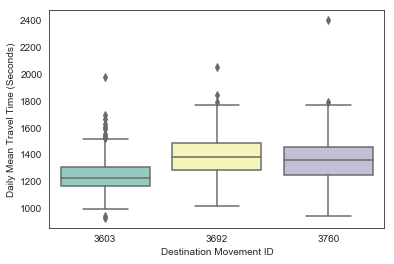

In [204]:
a = sns.boxplot(x='Destination Movement ID', y='Daily Mean Travel Time (Seconds)',
                 data=bh_hotspots_3396, palette="Set3")
a

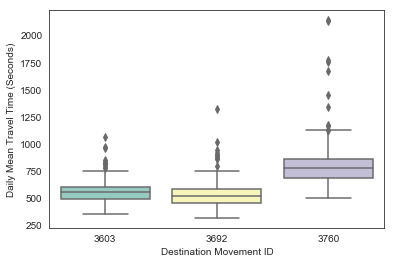

In [205]:
b = make_boxplot(bh_hotspots_3792)
b

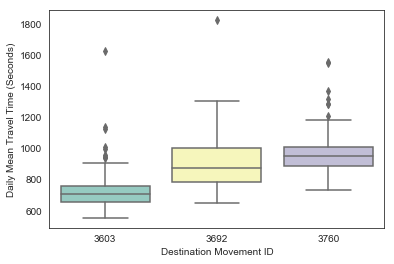

In [206]:
c = make_boxplot(bh_hotspots_3394)
c

In [234]:
def timeofday_boxplot(df, originid):
    timeofday_df = df[['Origin Movement ID', 'Origin Display Name', 'Destination Movement ID', 'Destination Display Name', 'Early Morning Mean Travel Time (Minutes)', 'Midday Mean Travel Time (Minutes)', 'Evening Mean Travel Time (Minutes)']]
    timeofday_df_melted = pd.melt(timeofday_df, id_vars=['Origin Movement ID', 'Origin Display Name', 'Destination Movement ID', 'Destination Display Name'], var_name='time of day', value_name='time')
    bplot = sns.barplot(x=timeofday_df_melted['time of day'], y=timeofday_df_melted["time"], hue=timeofday_df_melted["Destination Movement ID"], palette="pastel")
    bplot.set_title("Travel Times to BART Stations from " + str(originid))
    bplot.set_xticklabels(bplot.get_xticklabels(),rotation=50)
    sns.set_style('white')
    bplot.set(xlabel='Time of Day', ylabel='Time (Minutes)')

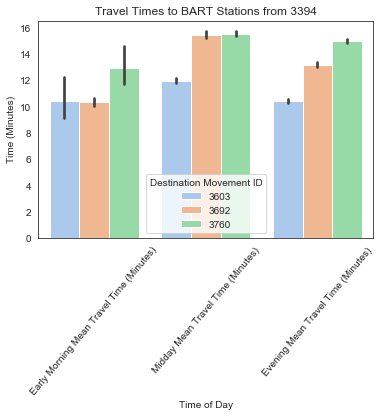

In [235]:
timeofday_boxplot(bh_hotspots_3394, 3394)

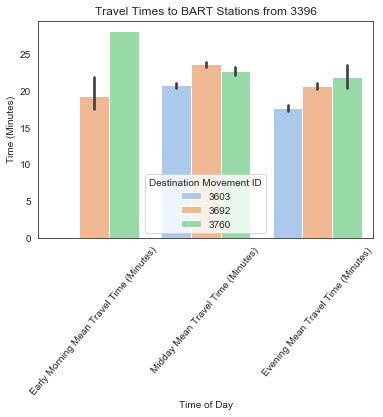

In [209]:
timeofday_boxplot(bh_hotspots_3396, 3396)

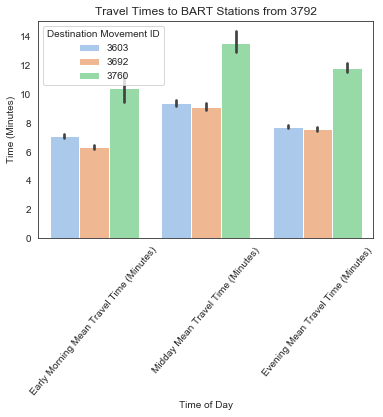

In [210]:
timeofday_boxplot(bh_hotspots_3792, 3792)

In [211]:
#section 2
#bh_data = pd.read_csv('datasets/barts_hotspots.csv');
#bh_df = bh_data
from datetime import datetime
def convert_weekdays(df):
    dow_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['dow'] = df['Date'].apply(lambda x : dow_index[datetime.strptime(x, '%m/%d/%Y').weekday()])
    return df

In [212]:
week_hotspot_3394 = convert_weekdays(bh_hotspots_3394)
week_hotspot_3394

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes),dow
8,05/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",878.0,621.0,1243.0,904.0,650.0,...,568.0,438.0,736.0,14.633333,15.066667,18.016667,12.200000,13.250000,9.466667,Wednesday
10,06/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",730.0,544.0,978.0,NaN,NaN,...,NaN,NaN,NaN,12.166667,NaN,12.133333,11.883333,12.500000,NaN,Saturday
13,05/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",687.0,360.0,1311.0,818.0,594.0,...,NaN,NaN,NaN,11.450000,13.633333,NaN,10.550000,10.416667,NaN,Wednesday
19,05/07/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",804.0,585.0,1106.0,899.0,643.0,...,NaN,NaN,NaN,13.400000,14.983333,NaN,13.333333,11.916667,NaN,Tuesday
26,04/10/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",790.0,581.0,1076.0,923.0,694.0,...,NaN,NaN,NaN,13.166667,15.383333,13.583333,11.550000,11.383333,NaN,Wednesday
27,05/09/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",750.0,591.0,952.0,836.0,663.0,...,NaN,NaN,NaN,12.500000,13.933333,11.783333,12.016667,11.566667,NaN,Thursday
31,06/14/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",831.0,602.0,1148.0,NaN,NaN,...,NaN,NaN,NaN,13.850000,NaN,17.033333,13.516667,11.183333,NaN,Friday
43,06/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",770.0,556.0,1066.0,NaN,NaN,...,NaN,NaN,NaN,12.833333,NaN,16.050000,10.966667,11.100000,NaN,Saturday
45,06/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",754.0,586.0,969.0,NaN,NaN,...,NaN,NaN,NaN,12.566667,NaN,12.933333,12.516667,12.500000,NaN,Saturday
55,04/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",876.0,605.0,1268.0,963.0,707.0,...,NaN,NaN,NaN,14.600000,16.050000,17.600000,11.883333,10.933333,NaN,Monday


In [213]:
from pandas.api.types import CategoricalDtype
dow = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=dow, ordered=True)
week_hotspot_3394['dow1'] = week_hotspot_3394['dow'].astype(cat_type)
week_hotspot_3394

,Date,Origin Movement ID,Origin Display Name,Destination Movement ID,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),AM Range - Lower Bound Travel Time (Seconds),...,Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes),dow,dow1
8,05/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",878.0,621.0,1243.0,904.0,650.0,...,438.0,736.0,14.633333,15.066667,18.016667,12.200000,13.250000,9.466667,Wednesday,Wednesday
10,06/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",730.0,544.0,978.0,NaN,NaN,...,NaN,NaN,12.166667,NaN,12.133333,11.883333,12.500000,NaN,Saturday,Saturday
13,05/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",687.0,360.0,1311.0,818.0,594.0,...,NaN,NaN,11.450000,13.633333,NaN,10.550000,10.416667,NaN,Wednesday,Wednesday
19,05/07/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",804.0,585.0,1106.0,899.0,643.0,...,NaN,NaN,13.400000,14.983333,NaN,13.333333,11.916667,NaN,Tuesday,Tuesday
26,04/10/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",790.0,581.0,1076.0,923.0,694.0,...,NaN,NaN,13.166667,15.383333,13.583333,11.550000,11.383333,NaN,Wednesday,Wednesday
27,05/09/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",750.0,591.0,952.0,836.0,663.0,...,NaN,NaN,12.500000,13.933333,11.783333,12.016667,11.566667,NaN,Thursday,Thursday
31,06/14/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",831.0,602.0,1148.0,NaN,NaN,...,NaN,NaN,13.850000,NaN,17.033333,13.516667,11.183333,NaN,Friday,Friday
43,06/15/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",770.0,556.0,1066.0,NaN,NaN,...,NaN,NaN,12.833333,NaN,16.050000,10.966667,11.100000,NaN,Saturday,Saturday
45,06/29/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",754.0,586.0,969.0,NaN,NaN,...,NaN,NaN,12.566667,NaN,12.933333,12.516667,12.500000,NaN,Saturday,Saturday
55,04/01/2019,3394,"Fisherman's Wharf, San Francisco, CA",3603,"Embarcadero, San Francisco, CA",876.0,605.0,1268.0,963.0,707.0,...,NaN,NaN,14.600000,16.050000,17.600000,11.883333,10.933333,NaN,Monday,Monday


In [214]:
week_group = week_hotspot_3394.groupby(['dow','Destination Movement ID'])['Daily Mean Travel Time (Seconds)'].mean()

Text(0.5, 1.0, 'Mean Travel Times to BART Stations from 3394')

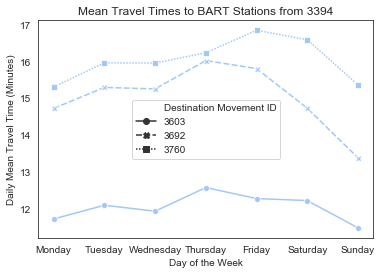

In [239]:
#section 2
#bh_data = pd.read_csv('datasets/barts_hotspots.csv');
#bh_df = bh_data
from datetime import datetime
from pandas.api.types import CategoricalDtype
def convert_weekdays(df):
    dow_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['dow'] = df['Date'].apply(lambda x : dow_index[datetime.strptime(x, '%m/%d/%Y').weekday()])
    dow = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    cat_type = CategoricalDtype(categories=dow, ordered=True)
    df['dow'] = df['dow'].astype(cat_type)
    return df
week_hotspot_3394 = convert_weekdays(bh_hotspots_3394)
lplot = sns.lineplot(x="dow", y="Daily Mean Travel Time (Minutes)",style='Destination Movement ID',err_style=None,markers=True,data=week_hotspot_3394)
lplot.set(xlabel='Day of the Week')
lplot.set_title("Mean Travel Times to BART Stations from 3394")


Text(0.5, 1.0, 'Mean Travel Times to BART Stations from 3792')

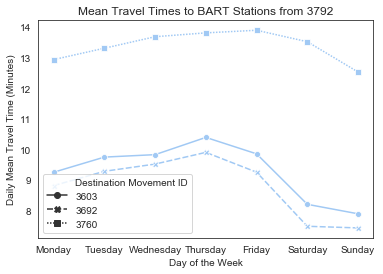

In [242]:
week_hotspot_3792 = convert_weekdays(bh_hotspots_3792)
lplot = sns.lineplot(x="dow", y="Daily Mean Travel Time (Minutes)",style='Destination Movement ID',err_style=None,markers=True,data=week_hotspot_3792)
lplot.set(xlabel='Day of the Week')
lplot.set_title("Mean Travel Times to BART Stations from 3792")

Text(0.5, 1.0, 'Mean Travel Times to BART Stations from 3396')

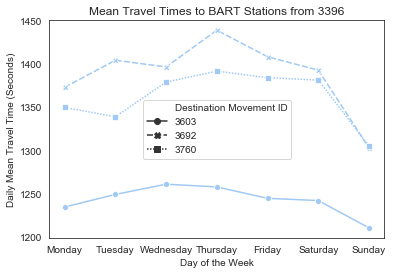

In [243]:
week_hotspot_3792 = convert_weekdays(bh_hotspots_3396)
lplot = sns.lineplot(x="dow", y="Daily Mean Travel Time (Seconds)",style='Destination Movement ID',err_style=None,markers=True,data=bh_hotspots_3396)
lplot.set(xlabel='Day of the Week')
lplot.set_title("Mean Travel Times to BART Stations from 3396")




In [218]:
d = {'Origin Movement ID':[3394,3394,3394,3792,3792,3792 ,3396,3396,3396,3603,3603,3603,3692,3692,3692,3760,3760,3760],
    'Destination Movement ID':[3603, 3692, 3760,3603, 3692, 3760,3603, 3692, 3760,3394, 3792, 3396,3394, 3792, 3396,3394, 3792, 3396]}

In [219]:
#toward center: 1, away from center : 0 
direction = pd.DataFrame(d)
direction
di = [1]*3+[0]+[1]*5+[0]+[1]+[0]*7
direction['tocenter'] = di

In [220]:
bh = convert_weekdays(bh)

In [221]:
bh_with_direction = direction.merge(bh)
bh_with_direction

,Origin Movement ID,Destination Movement ID,tocenter,Date,Origin Display Name,Destination Display Name,Daily Mean Travel Time (Seconds),Daily Range - Lower Bound Travel Time (Seconds),Daily Range - Upper Bound Travel Time (Seconds),AM Mean Travel Time (Seconds),...,Early Morning Mean Travel Time (Seconds),Early Morning Range - Lower Bound Travel Time (Seconds),Early Morning Range - Upper Bound Travel Time (Seconds),Daily Mean Travel Time (Minutes),AM Mean Travel Time (Minutes),PM Mean Travel Time (Minutes),Midday Mean Travel Time (Minutes),Evening Mean Travel Time (Minutes),Early Morning Mean Travel Time (Minutes),dow
0,3394,3603,1,05/15/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",878.0,621.0,1243.0,904.0,...,568.0,438.0,736.0,14.633333,15.066667,18.016667,12.200000,13.250000,9.466667,Wednesday
1,3394,3603,1,06/01/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",730.0,544.0,978.0,NaN,...,NaN,NaN,NaN,12.166667,NaN,12.133333,11.883333,12.500000,NaN,Saturday
2,3394,3603,1,05/29/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",687.0,360.0,1311.0,818.0,...,NaN,NaN,NaN,11.450000,13.633333,NaN,10.550000,10.416667,NaN,Wednesday
3,3394,3603,1,05/07/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",804.0,585.0,1106.0,899.0,...,NaN,NaN,NaN,13.400000,14.983333,NaN,13.333333,11.916667,NaN,Tuesday
4,3394,3603,1,04/10/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",790.0,581.0,1076.0,923.0,...,NaN,NaN,NaN,13.166667,15.383333,13.583333,11.550000,11.383333,NaN,Wednesday
5,3394,3603,1,05/09/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",750.0,591.0,952.0,836.0,...,NaN,NaN,NaN,12.500000,13.933333,11.783333,12.016667,11.566667,NaN,Thursday
6,3394,3603,1,06/14/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",831.0,602.0,1148.0,NaN,...,NaN,NaN,NaN,13.850000,NaN,17.033333,13.516667,11.183333,NaN,Friday
7,3394,3603,1,06/15/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",770.0,556.0,1066.0,NaN,...,NaN,NaN,NaN,12.833333,NaN,16.050000,10.966667,11.100000,NaN,Saturday
8,3394,3603,1,06/29/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",754.0,586.0,969.0,NaN,...,NaN,NaN,NaN,12.566667,NaN,12.933333,12.516667,12.500000,NaN,Saturday
9,3394,3603,1,04/01/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",876.0,605.0,1268.0,963.0,...,NaN,NaN,NaN,14.600000,16.050000,17.600000,11.883333,10.933333,NaN,Monday


Text(0.5, 1.0, 'Mean Travel Times throughout the Week Based on Direction')

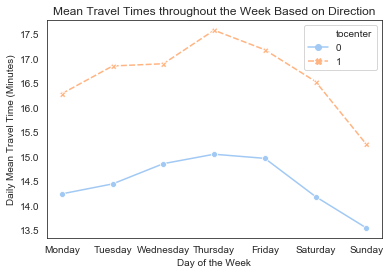

In [245]:
lplot = sns.lineplot(x="dow", y="Daily Mean Travel Time (Minutes)",hue='tocenter',style='tocenter',err_style=None,markers=True,data=bh_with_direction)
lplot.set(xlabel='Day of the Week')
lplot.set_title("Mean Travel Times throughout the Week Based on Direction")

In [223]:
reconstruct = bh_with_direction[['Origin Movement ID', 'Destination Movement ID', 'tocenter', 'Date','Origin Display Name', 'Destination Display Name','dow']]
reconstruct_AM_PM= pd.concat([reconstruct]*2,axis = 0)
reconstruct_MIDDAY_M_E= pd.concat([reconstruct]*3,axis = 0)
reconstruct_AM_PM['time'] = ['AM']*len(bh_with_direction)+['PM']*len(bh_with_direction)
reconstruct_MIDDAY_M_E['time'] =['Midday']*len(bh_with_direction) +['Evening']*len(bh_with_direction)+['Early Morning']*len(bh_with_direction)
add_Am = (pd.Series.tolist(bh_with_direction['AM Mean Travel Time (Seconds)'])+
 pd.Series.tolist(bh_with_direction['PM Mean Travel Time (Seconds)']))

add_mme = (pd.Series.tolist(bh_with_direction['Midday Mean Travel Time (Seconds)'])+
     pd.Series.tolist(bh_with_direction['Evening Mean Travel Time (Seconds)'])+
     pd.Series.tolist(bh_with_direction['Early Morning Mean Travel Time (Seconds)'])
          )

In [255]:
reconstruct_AM_PM['average time'] = add_Am
reconstruct_MIDDAY_M_E['average time'] = add_mme
reconstruct_AM_PM['average time min'] = reconstruct_AM_PM['average time']/60
reconstruct_MIDDAY_M_E['average time min'] = reconstruct_MIDDAY_M_E['average time']/60
dayflow = [ 'Early Morning', 'Midday', 'Evening']
cat_type = CategoricalDtype(categories=dayflow, ordered=True)
reconstruct_MIDDAY_M_E['time'] = reconstruct_MIDDAY_M_E['time'].astype(cat_type)
reconstruct_MIDDAY_M_E

,Origin Movement ID,Destination Movement ID,tocenter,Date,Origin Display Name,Destination Display Name,dow,time,average time,average time min
0,3394,3603,1,05/15/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",Wednesday,Midday,732.0,12.200000
1,3394,3603,1,06/01/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",Saturday,Midday,713.0,11.883333
2,3394,3603,1,05/29/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",Wednesday,Midday,633.0,10.550000
3,3394,3603,1,05/07/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",Tuesday,Midday,800.0,13.333333
4,3394,3603,1,04/10/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",Wednesday,Midday,693.0,11.550000
5,3394,3603,1,05/09/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",Thursday,Midday,721.0,12.016667
6,3394,3603,1,06/14/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",Friday,Midday,811.0,13.516667
7,3394,3603,1,06/15/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",Saturday,Midday,658.0,10.966667
8,3394,3603,1,06/29/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",Saturday,Midday,751.0,12.516667
9,3394,3603,1,04/01/2019,"Fisherman's Wharf, San Francisco, CA","Embarcadero, San Francisco, CA",Monday,Midday,713.0,11.883333


Text(0.5, 1.0, 'Mean Travel Times based on Day of Week')

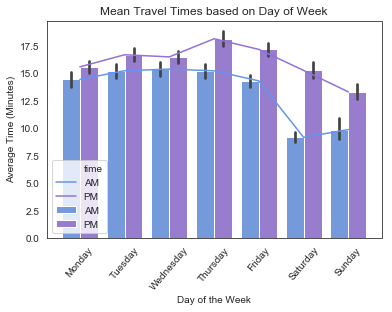

In [259]:
bplot1 = sns.barplot(x="dow", y="average time min",
palette=['cornflowerblue', 'mediumpurple'],
hue='time',data=reconstruct_AM_PM)
lplot1 = sns.lineplot(x="dow", y="average time min",
palette=['cornflowerblue', 'mediumpurple'],
hue='time',data=reconstruct_AM_PM,err_style=None,markers=True)
bplot1.set_xticklabels(bplot1.get_xticklabels(),rotation = 50)
lplot1.set_xticklabels(bplot1.get_xticklabels(),rotation = 50)
lplot1.set(xlabel='Day of the Week', ylabel='Average Time (Minutes)')
lplot1.set_title("Mean Travel Times based on Day of Week")

Text(0.5, 1.0, 'Mean Travel Times based on Day of Week')

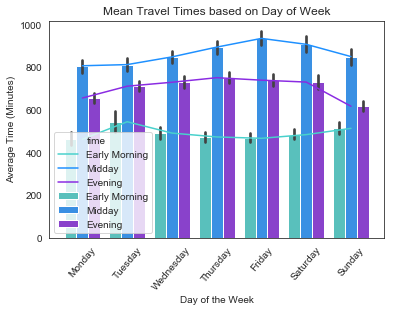

In [258]:
colors=['mediumturquoise', 'dodgerblue', 'blueviolet']
bplot2 = sns.barplot(x="dow", y="average time",
palette=colors,
hue='time',data=reconstruct_MIDDAY_M_E)
lplot2 = sns.lineplot(x="dow", y="average time",
palette=colors,
hue='time',data=reconstruct_MIDDAY_M_E,err_style=None,markers=True)
bplot2.set_xticklabels(bplot1.get_xticklabels(),rotation = 50)
lplot2.set_xticklabels(bplot1.get_xticklabels(),rotation = 50)
lplot2.set(xlabel='Day of the Week', ylabel='Average Time (Minutes)')
lplot2.set_title("Mean Travel Times based on Day of Week")